# Ujian Tengah Semester

Nama: Nicholas Jeremy Hendrajaya  
NPM: 2310631170109  
Kelas: 5A - Informatika  

## 1. Import Library dan Load Dataset

In [ ]:
# Import library dasar
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Load dataset mobil bekas
!wget -q -O used_cars.csv "https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv"

In [ ]:
dataset = pd.read_csv("used_cars.csv")
print("Shape dataset:", dataset.shape)
dataset.head()

Shape dataset: (6019, 13)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


## 2. Preprocessing

### a. Profiling Data

In [ ]:
# Untuk menampilkan informasi data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  5719 non-null   float64
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


In [ ]:
# Untuk menampilkan Statistika Deskriptif
dataset.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,5719.000000,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,3009.000000,2013.358199,57545.592586,18.134961,1621.276450,113.253050,5.278735,9.479468
std,1737.679967,3.269742,37988.496154,4.582289,601.355233,53.874957,0.808840,11.187917
min,0.000000,1998.000000,171.000000,0.000000,72.000000,34.200000,0.000000,0.440000
25%,1504.500000,2011.000000,33923.000000,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,3009.000000,2014.000000,53000.000000,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,4513.500000,2016.000000,72998.000000,21.100000,1984.000000,138.100000,5.000000,9.950000
max,6018.000000,2019.000000,775000.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [ ]:
# Mencari jumlah missing value per kolom
dataset.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,300
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


### b. Exploratory Data Analysis (EDA)

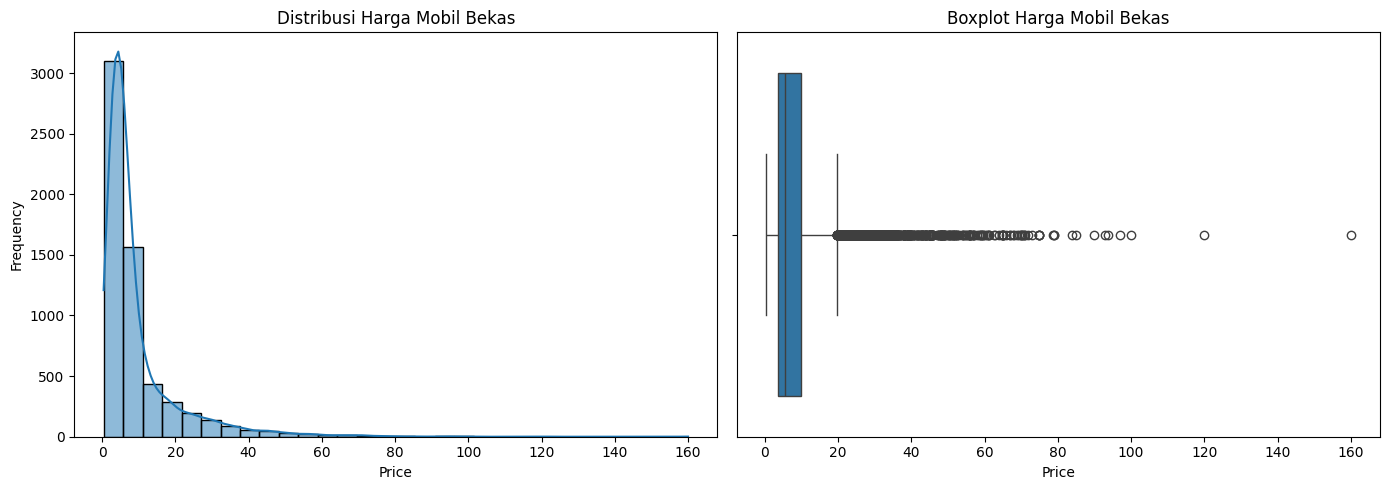

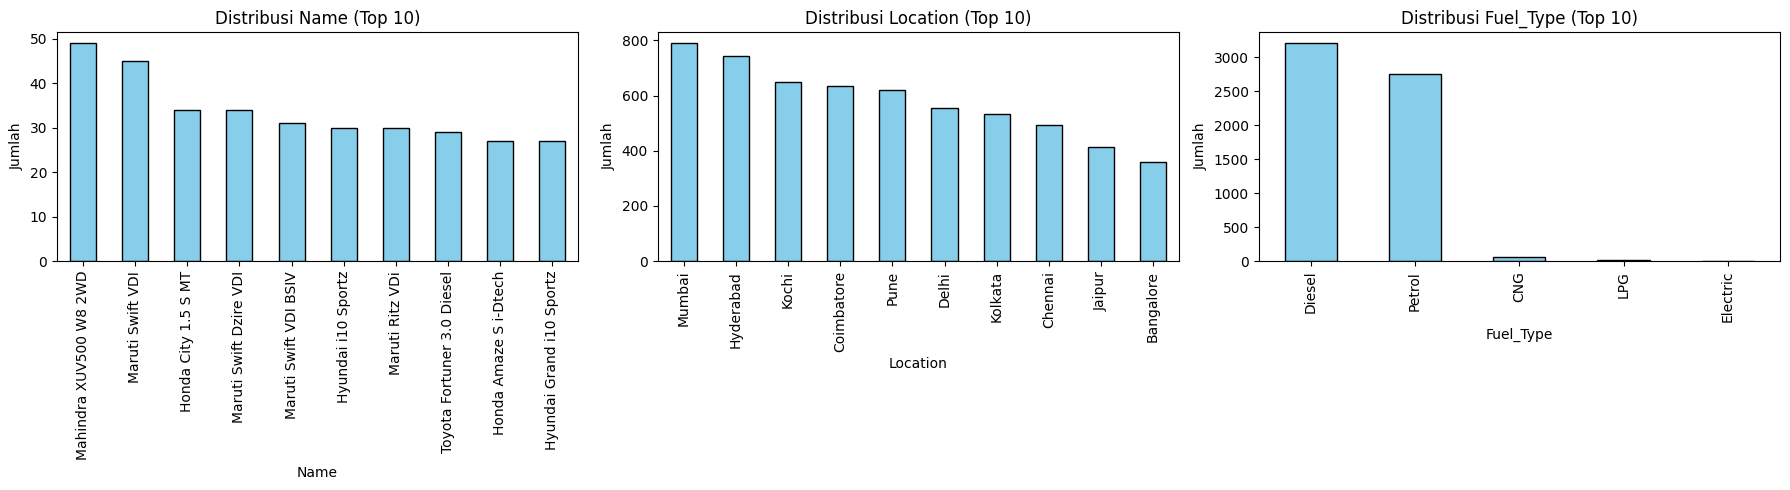

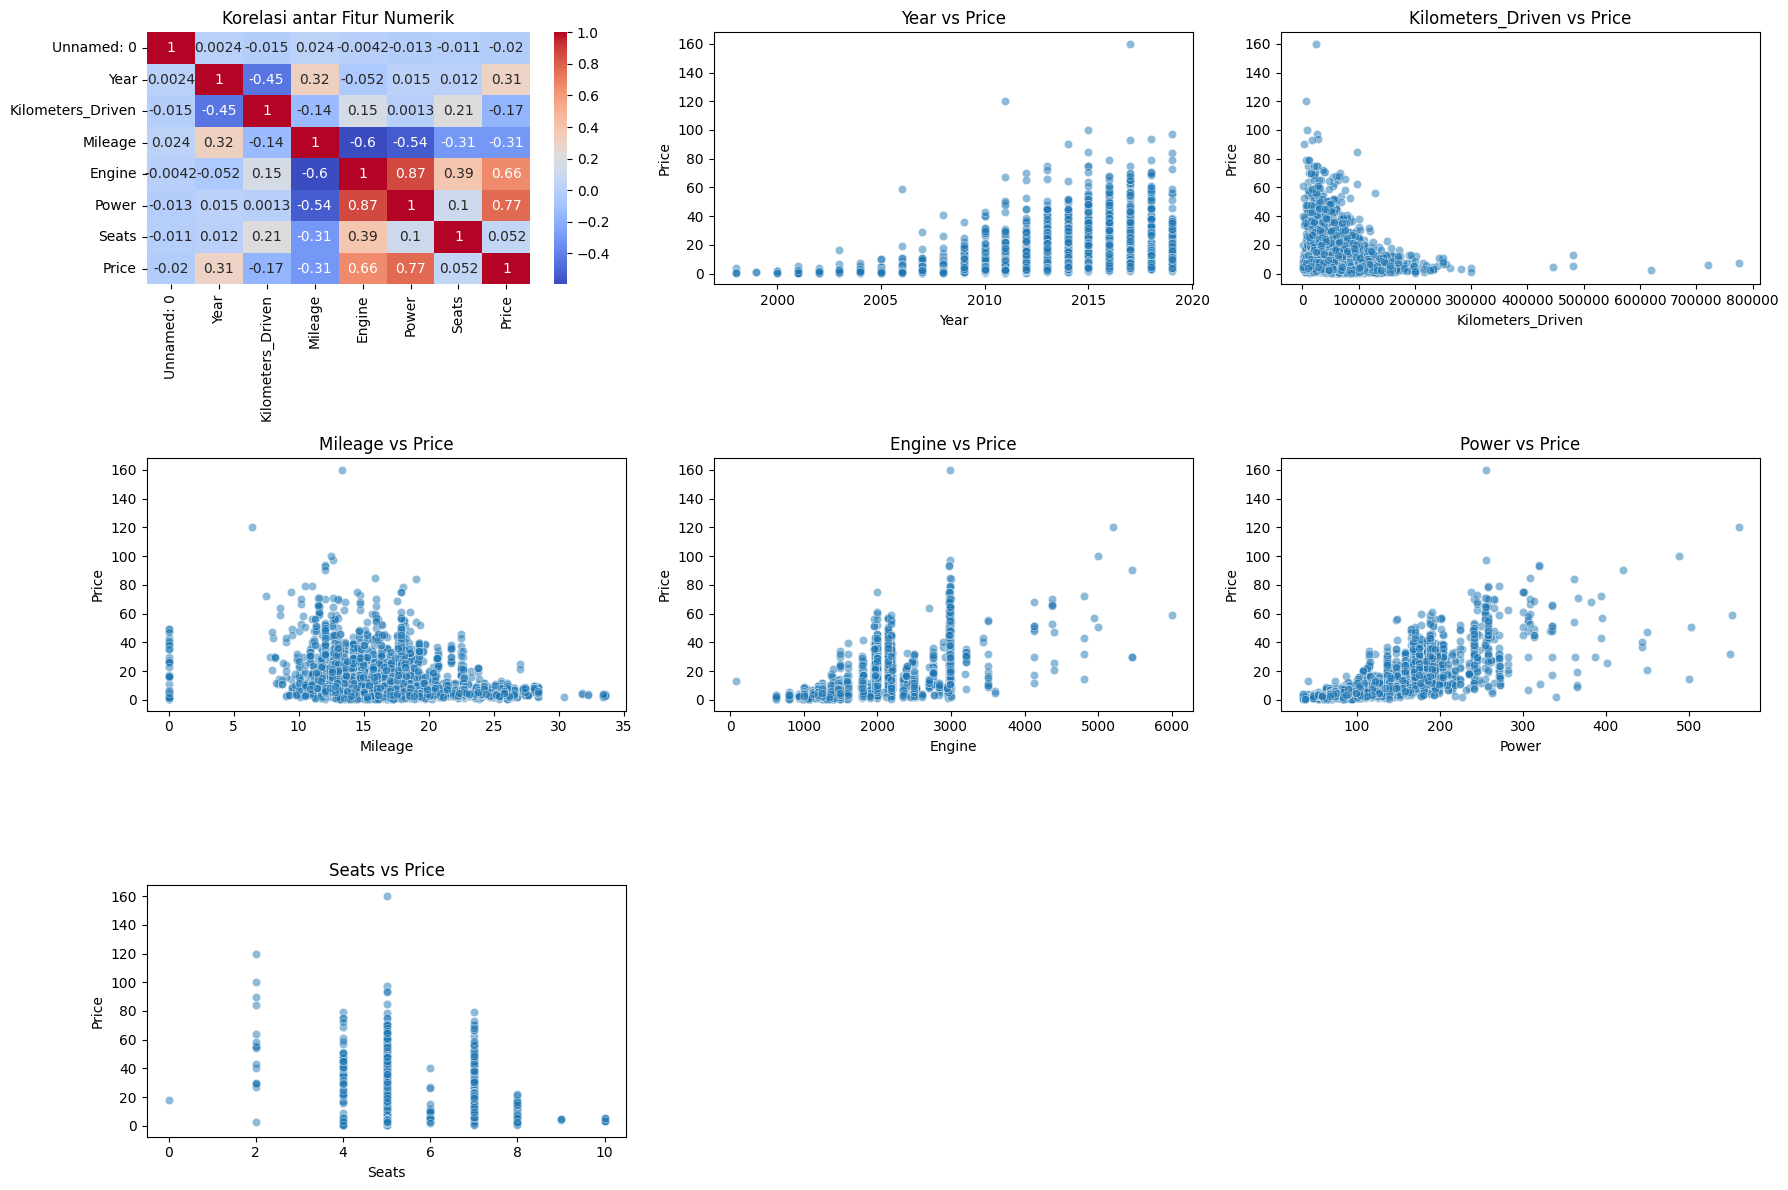

In [ ]:
# Agar histogram dan boxplot harga tampil dalam 1 figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(dataset['Price'].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribusi Harga Mobil Bekas")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")

sns.boxplot(x=dataset['Price'], ax=axes[1])
axes[1].set_title("Boxplot Harga Mobil Bekas")
axes[1].set_xlabel("Price")

plt.tight_layout()
plt.show()

# Grafik batang kategori (maks 3 kolom)
cat_cols = dataset.select_dtypes(include=['object','category']).columns.tolist()
n_cat = min(3, len(cat_cols))

fig, axes = plt.subplots(1, n_cat, figsize=(6*n_cat, 5))
if n_cat == 1:
    axes = [axes]

for i, col in enumerate(cat_cols[:n_cat]):
    dataset[col].value_counts().head(10).plot(
        kind='bar', color='skyblue', edgecolor='black', ax=axes[i]
    )
    axes[i].set_title(f"Distribusi {col} (Top 10)")
    axes[i].set_ylabel("Jumlah")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Menampilkan heatmap + scatter plot price vs fitur numerik penting (dalam bentuk grid)
num_cols_for_scatter = [col for col in ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats'] if col in dataset.columns]

plots = ['Heatmap'] + num_cols_for_scatter
n_cols = 3
n_rows = int(np.ceil(len(plots) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = np.array(axes).reshape(n_rows, n_cols)

for i, col in enumerate(plots):
    r, c = divmod(i, n_cols)
    if col == 'Heatmap':
        num_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
        if len(num_cols) > 1:
            sns.heatmap(dataset[num_cols].corr(), annot=True, cmap="coolwarm", ax=axes[r][c])
            axes[r][c].set_title("Korelasi antar Fitur Numerik")
        else:
            axes[r][c].axis("off")
    else:
        sns.scatterplot(x=dataset[col], y=dataset['Price'], alpha=0.5, ax=axes[r][c])
        axes[r][c].set_title(f"{col} vs Price")
        axes[r][c].set_xlabel(col)
        axes[r][c].set_ylabel("Price")

# Mengosongkan subplot yang tidak terpakai
for j in range(len(plots), n_rows*n_cols):
    r, c = divmod(j, n_cols)
    axes[r][c].axis("off")

plt.tight_layout()
plt.show()


### c. Data Cleaning

In [ ]:
# Buat salinan data biar aman
df_clean = dataset.copy()

In [ ]:
# Cek nilai null
print("Jumlah nilai null tiap kolom:")
print(df_clean.isnull().sum())

# Hapus baris yang ada nilai null
df_clean = df_clean.dropna()
print("\nSetelah drop NA:", df_clean.shape)

Jumlah nilai null tiap kolom:
Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometers_Driven    300
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

Setelah drop NA: (5582, 13)


In [ ]:
# Cek data duplikat
print("\nJumlah data duplikat:", df_clean.duplicated().sum())

# Hapus data duplikat
df_clean = df_clean.drop_duplicates()
print("Setelah drop duplicates:", df_clean.shape)


Jumlah data duplikat: 0
Setelah drop duplicates: (5582, 13)


In [ ]:
# Cek apakah ada kolom ID
print("\nKolom dataset:", df_clean.columns.tolist())
if 'id' in df_clean.columns:
    df_clean = df_clean.drop(columns=['id'])
    print("Kolom 'id' dihapus")


Kolom dataset: ['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


In [ ]:
# Cek outlier di kolom harga (price)
Q1 = df_clean['Price'].quantile(0.25)
Q3 = df_clean['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

before = df_clean.shape[0]
df_clean = df_clean[(df_clean['Price'] >= lower) & (df_clean['Price'] <= upper)]
after = df_clean.shape[0]

print(f"\nRemove outliers pada 'price': {before-after} baris dihapus")
print("Shape final setelah cleaning:", df_clean.shape)


Remove outliers pada 'price': 671 baris dihapus
Shape final setelah cleaning: (4911, 13)


### d. Data Transformations

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df_clean.drop('Price', axis=1)   # semua kolom selain price
y = df_clean['Price']                # target = price

# Cek ukuran data setelah dipisah
print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (4911, 12)
Shape y: (4911,)


In [ ]:
# Untuk mendeteksi kolom numerik dan kategorikal
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# Menampilkan hasil
print("\nKolom numerik:", numeric_cols)
print("Kolom kategorikal:", categorical_cols)


Kolom numerik: ['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
Kolom kategorikal: ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']


### f. Data Final

In [ ]:
# Cek apakah masih ada nilai null di X dan y
print("Jumlah missing values di X:", X.isnull().sum().sum())
print("Jumlah missing values di y:", y.isnull().sum())

Jumlah missing values di X: 0
Jumlah missing values di y: 0


In [ ]:
# Cek lagi jumlah baris dan kolom
print("\nShape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (4911, 12)
Shape y: (4911,)


In [ ]:
# Hanya untuk mengecek, maka menampilkan 5 baris pertama dari X dan y
print("\nContoh data X (fitur):")
display(X.head())

print("\nContoh data y (target):")
print(y.head())



Contoh data X (fitur):


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0



Contoh data y (target):
0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64


## 3. Modelling

In [ ]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data train:", X_train.shape, y_train.shape)
print("Ukuran data test :", X_test.shape, y_test.shape)

Ukuran data train: (3928, 12) (3928,)
Ukuran data test : (983, 12) (983,)


In [ ]:
# Melakukan scaling hanya untuk kolom numerik, fit scaler di data train lalu transform ke train & test
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numeric_cols])   # scaling data train
X_test_scaled  = scaler.transform(X_test[numeric_cols])        # scaling data test

# Ubah hasil scaling menjadi DataFrame agar tetap rapi
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=numeric_cols, index=X_test.index)

In [ ]:
# Gabungkan kembali hasil scaling ke variabel final (kalau ada kolom kategorikal, bisa digabung di sini)
X_train_final = X_train_scaled.copy()
X_test_final  = X_test_scaled.copy()

print("\nContoh data setelah scaling (train):")
display(X_train_final.head())


Contoh data setelah scaling (train):


,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
4116,0.626042,0.853223,-0.775433,-0.545534,-0.623310,-0.683652,-0.362622
5534,1.448961,0.539621,-0.617276,0.082320,-0.623310,-0.631210,-0.362622
4975,1.124552,0.853223,-0.436328,0.452473,-0.272239,-0.241493,-0.362622
1207,-1.062162,0.853223,0.824686,-1.360806,1.976620,0.002723,2.217774
207,-1.642500,0.226020,1.191031,1.122496,-0.290294,-0.859488,-0.362622


In [ ]:
# Membangun model Linear Regression
model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

In [ ]:
# Prediksi data uji
y_pred = model.predict(X_test_final)

print("\nContoh hasil prediksi harga mobil:")
print(y_pred[:5])


Contoh hasil prediksi harga mobil:
[ 3.14020426  4.81299799  6.01037749  7.10897196 -0.44592769]


## 4. Evaluasi Model

In [ ]:
# Prediksi data test
y_pred_test = model.predict(X_test_final)

# Buat DataFrame perbandingan Actual vs Predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
comparison_df = comparison_df.sort_index().reset_index(drop=True)

print("Perbandingan harga aktual vs prediksi:")
display(comparison_df.head(10))  # tampilkan hanya  10 data pertama

Perbandingan harga aktual vs prediksi:


,Actual,Predicted
0,5.20,6.472441
1,5.60,5.358544
2,18.55,12.305047
3,1.87,2.631588
4,2.75,3.243548
5,7.75,6.364338
6,6.98,7.019803
7,4.85,6.737420
8,1.25,-1.210187
9,3.30,4.790335


In [ ]:
# Hitung metrik evaluasi
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = math.sqrt(mse_test)

# Buat DataFrame nilai evaluasi
score = pd.DataFrame({
    'Metrik': ['R²', 'MAE', 'MSE', 'RMSE'],
    'Nilai': [r2_test, mae_test, mse_test, rmse_test]
})

print("\nHasil evaluasi model:")
display(score)


Hasil evaluasi model:


,Metrik,Nilai
0,R²,0.699125
1,MAE,1.592233
2,MSE,5.078290
3,RMSE,2.253506


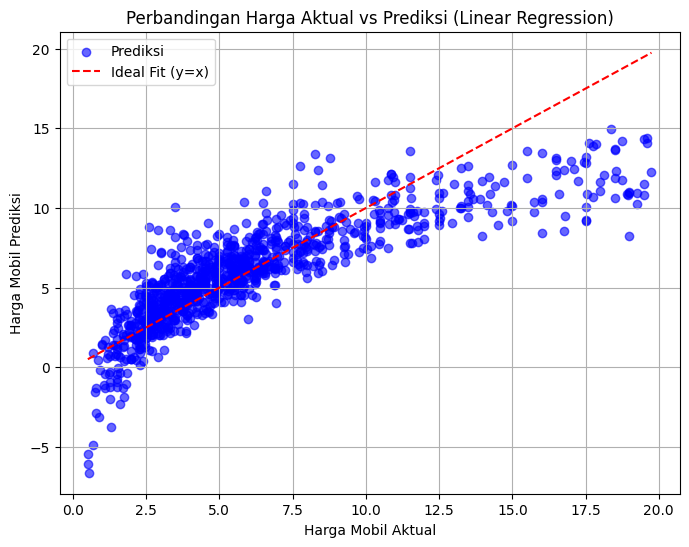

In [ ]:
# Scatter plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, label="Prediksi")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--', label="Ideal Fit (y=x)")
plt.xlabel('Harga Mobil Aktual')
plt.ylabel('Harga Mobil Prediksi')
plt.title('Perbandingan Harga Aktual vs Prediksi (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()